# Decision Tree

### Atividades

1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto 
randômico de dados para a medida Gini e compare os resultados.
Ref1.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
Ref2.: https://en.wikipedia.org/wiki/Decision_tree_learning

2. Faça o balanceamento dos dados contidos em "train.csv", aplique o algoritmo de Decision Tree e faça a submissão no kaggle. Tente melhorar o resultado obtido em sala de aula (posição 3100 no leaderboard).
Dataset: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

3. (Opcional) Execute uma Random Forest na competição do Kaggle e veja se a acurácia melhora. Utilize 10, 100 ou 1000 árvores (dependendo de quanto o seu computador aguentar =]): http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html




### Atividade 1

In [186]:
#Importa as bibliotecas
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [187]:
#Essa atividade utiliza  o dataset da porto seguro, 
#caso seja necessário reproduzir os resultados, por favor 
#baixar o dataset em kaggle.com
data = pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [188]:
#Separa o dataset em classes e features
data = data.sample(frac=1).reset_index(drop=True)
X_data = data.iloc[:,2:]
y_data = data.iloc[:,1]

In [189]:
#Separa os dados em treino e teste e validação
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data.values.flatten(), test_size=0.25)

In [190]:
#Carrega o decision tree com entropia
dec_tree_entropy = DecisionTreeClassifier(criterion='entropy')
dec_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [191]:
#Armazena o resultado para entropia
result_entropy = dec_tree_entropy.score(X_test, y_test)

In [192]:
#Carrega o decision tree com gini
dec_tree_gini = DecisionTreeClassifier(criterion='gini')
dec_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [193]:
#Armazena o resultado para gini
result_gini = dec_tree_gini.score(X_test, y_test)

In [194]:
print('O resulta para decision tree com fator de decisão\nentropy foi {0}, e para o gini {1}'.format(result_entropy,result_gini))

O resulta para decision tree com fator de decisão
entropy foi 0.9222932333353494, e para o gini 0.9167153888026451


Em geral, o resultado para o fator de decisão entropia apresentou melhores resultados em comparação com gini. Os valores variam de acordo com a execução, então em algumas execuções o fator gini pode apresentar melhores resultados. Os valores obtidos são apresentados acima.

### Atividade 2

In [195]:
#Verifica o número de dados de cada classe
print('Número de dados de classe 0 = {0} e classe 1 = {1}'.format(sum(y_data == 0),sum(y_data == 1)))

Número de dados de classe 0 = 573518 e classe 1 = 21694


In [196]:
#Função de balanceamento das classes
def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            this_xs = this_xs.reindex(np.random.permutation(this_xs.index))

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = pd.concat(xs)
    ys = pd.Series(data=np.concatenate(ys),name='target')

    return xs,ys

In [197]:
#Balanceamento dos dados em relação a classe
X_train_balanced,y_train_balanced = balanced_subsample(X_data,y_data)

In [198]:
#Verifica novamente o número de dados de cada classe
print('Número de dados de classe 0 = {0} e classe 1 = {1}'.format(sum(y_train_balanced == 0),sum(y_train_balanced == 1)))

Número de dados de classe 0 = 21694 e classe 1 = 21694


In [199]:
#Separa os dados em treino e teste e validação
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_train_balanced,y_train_balanced.values.flatten(), test_size=0.25)

In [200]:
#Executa o decision tree para os novos dados balanceados
dec_tree_entropy = DecisionTreeClassifier(criterion='entropy')
dec_tree_entropy.fit(X_train_b, y_train_b)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [201]:
#Resultado após o balanceamento
dec_tree_entropy.score(X_test_b, y_test_b)

0.520604775513967

In [202]:
#Carrega e prepara o dataset para submissão 
test_data = pd.read_csv('test.csv')
pred = dec_tree_entropy.predict(test_data.iloc[:,1:])
submission = pd.DataFrame()
submission['id'] = test_data.iloc[:, 0]
submission['target'] = pred
submission.to_csv('kaggle_submission.csv', index=False)

Após a submissão no kaggle, a posição no rank geral foi de 4889 com score de 0.04633. O balanceamento entre as classes piorou a posição, que anteriormente era de 3100. 

### Atividade 3

In [177]:
#Carrega o random forest com várias árvores
accuracy = []
for i in range(1,20):
    rdn_forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    rdn_forest.fit(X_train_b, y_train_b)
    accuracy.append(rdn_forest.score(X_test, y_test))

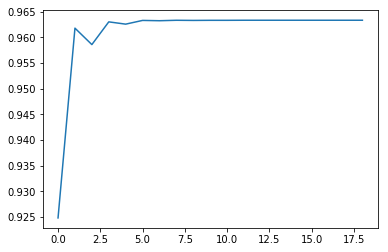

Melhor resultado 0.9633071913872704 utilizando 11 árvores


In [203]:
#Plota os resultados
plt.plot(accuracy)
plt.show()

best_result = np.argmax(accuracy)
print ("Melhor resultado {0} utilizando {1} árvores".format(accuracy[np.argmax(accuracy)], best_result))

In [204]:
#Executa o random forest para o melhor resultado
rdn_forest = RandomForestClassifier(n_estimators=best_result, criterion='entropy')
rdn_forest.fit(X_train_b, y_train_b)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
#Carrega e prepara o dataset para submissão 
test_data = pd.read_csv('test.csv')
pred = rdn_forest.predict(test_data.iloc[:,1:])
submission = pd.DataFrame()
submission['id'] = test_data.iloc[:, 0]
submission['target'] = pred
submission.to_csv('kaggle_submission.csv', index=False)

Utilizando o random forest com entropia para os mesmo dados balancedados. O score do kaggle passou de 0.04633 para 0.09799. Tendo uma melhoria significativa. 